In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
raw_data = pd.read_csv('Wine.csv')

In [3]:
raw_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


### Q1. Compute and plot those feature which are related to each other?

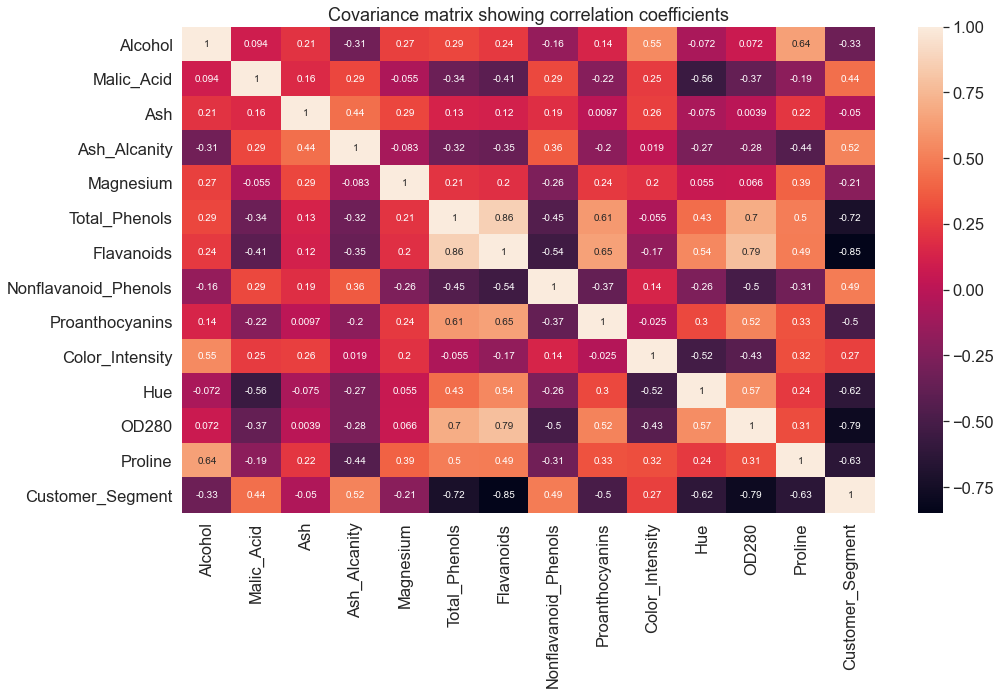

In [4]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(pd.DataFrame(raw_data).corr(),annot=True,annot_kws={"size":10})
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

In [5]:
corr = raw_data.corr()

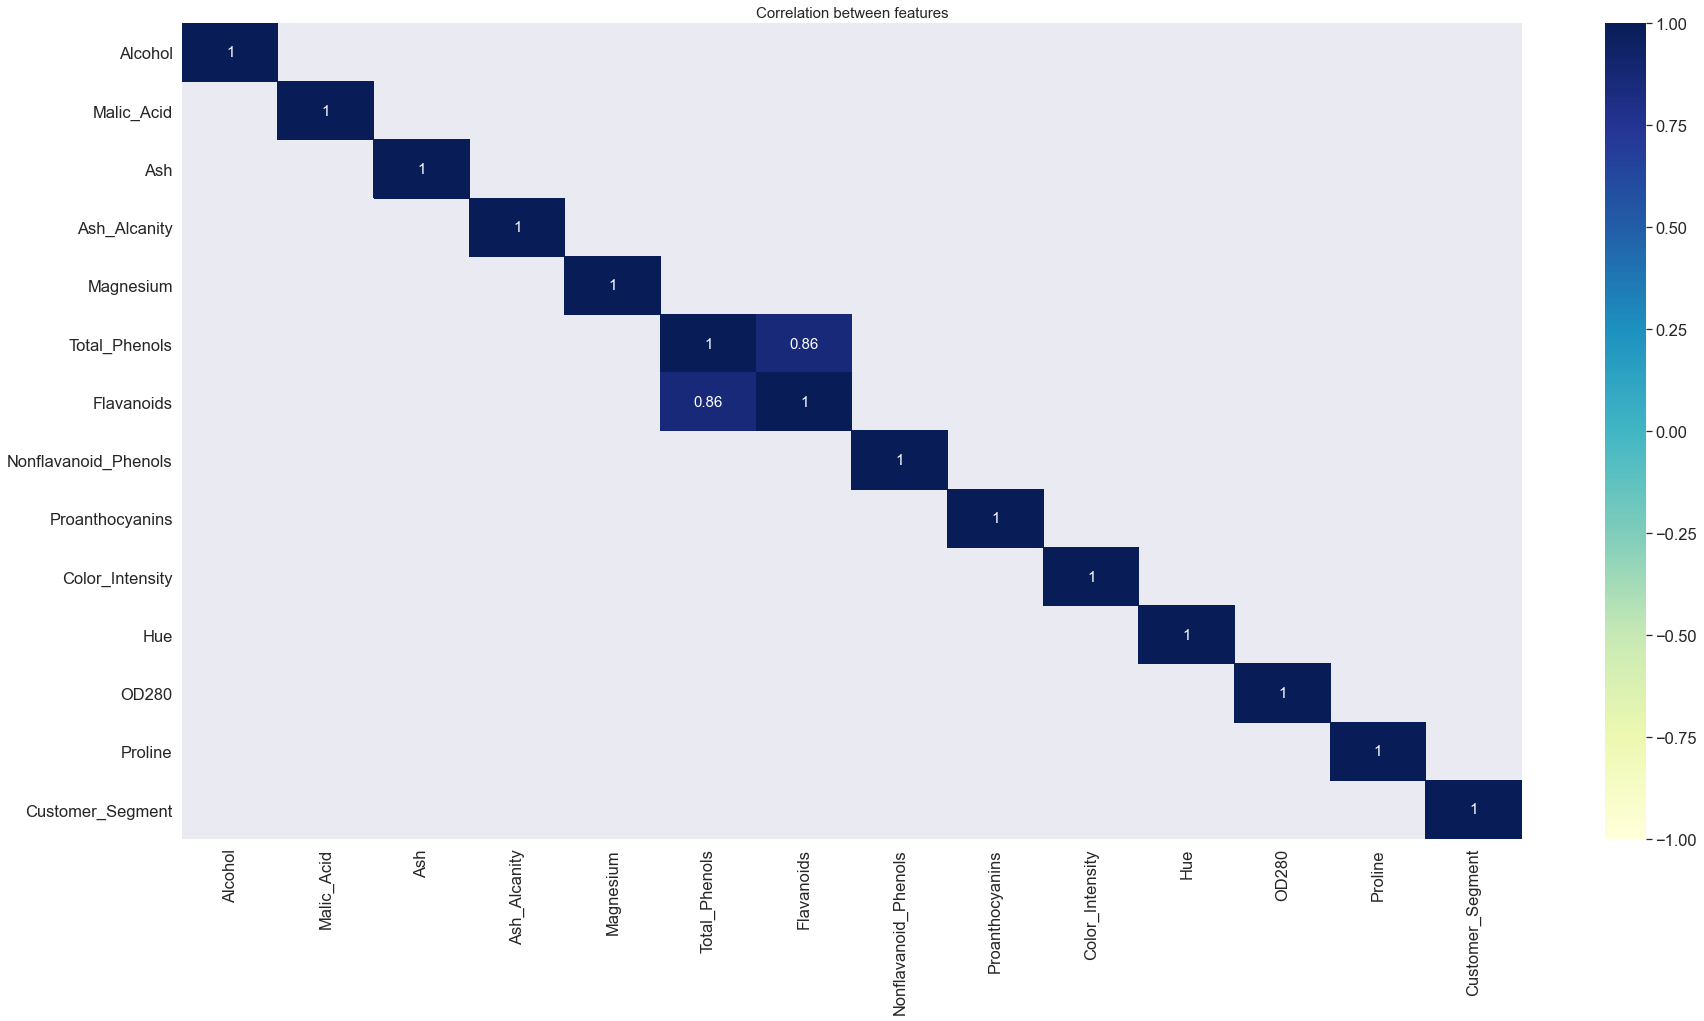

In [6]:
plt.figure(figsize=(30, 15))

sns.heatmap(corr[(corr >= 0.8) | (corr <= -0.9)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0,
            annot=True, annot_kws={"size": 15})
plt.title('Correlation between features', fontsize=15)
plt.show()

**Plotting related features**

In [7]:
from sklearn import preprocessing
Input_Data = raw_data.copy()
Flavanoids = Input_Data['Flavanoids'].to_list()
Total_Phenols = Input_Data['Total_Phenols'].to_list()
Flavanoids_Normalized = preprocessing.normalize([Flavanoids],norm='max')[0]
Total_Phenols_Normalized = preprocessing.normalize([Total_Phenols],norm='max')[0]
FlavanoidsMean = np.array(Flavanoids_Normalized).mean()
Total_PhenolsMean = np.array(Total_Phenols_Normalized).mean()

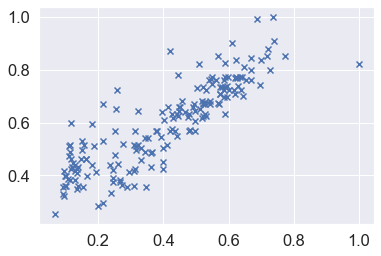

In [8]:
plt.scatter(Flavanoids_Normalized,Total_Phenols_Normalized,marker='x')

### Q2. What are the optimum number of principal components in PCA?

In [9]:
x = raw_data.drop(['Customer_Segment'],axis = 1)
Y = raw_data['Customer_Segment']

In [10]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
data_rescaled = scaler.fit_transform(x)

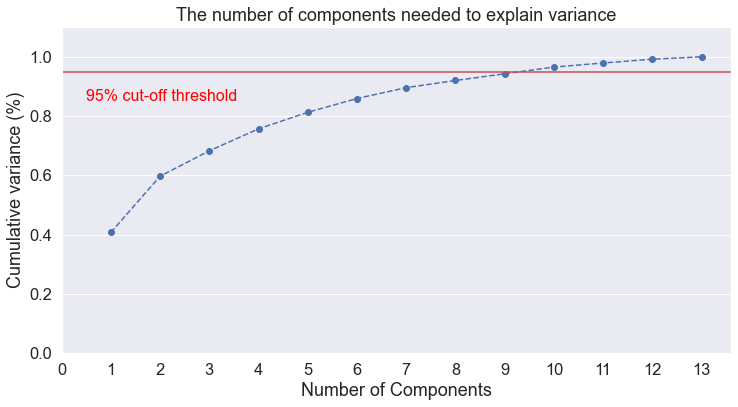

In [11]:
from sklearn.decomposition import PCA
pca = PCA().fit(data_rescaled)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 14, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 14, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

**Ans : Optimum Number of components is 9**

### Q3. Build a classifier considering optimal number of principal components and states it score ?

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
pca.fit(x)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ["Component_" + str(i) for i in range(1,10) ])

In [13]:
principalDf

,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9
0,318.562979,21.492131,3.130735,-0.250114,0.677078,0.568081,-0.619642,-0.199555,0.701280
1,303.097420,-5.364718,6.822835,-0.864035,-0.486096,0.014340,0.108865,0.604714,0.286717
2,438.061133,-6.537309,-1.113223,0.912411,0.380651,0.672404,0.785819,-0.500886,0.024547
3,733.240139,0.192729,-0.917257,-0.541251,0.858662,0.599122,0.018770,0.190428,0.054277
4,-11.571428,18.489995,-0.554422,1.360896,0.276442,0.768884,-0.309976,0.119091,-0.195843
...,...,...,...,...,...,...,...,...,...
173,-6.980211,-4.541137,-2.474707,-3.155920,-2.348927,1.439001,-0.026425,0.043705,0.040167
174,3.131605,2.335191,-4.309931,-1.562181,-1.168003,0.128679,0.003859,-0.303185,-0.159759
175,88.458074,18.776285,-2.237577,-4.820708,-1.057336,0.215000,0.648489,0.068966,0.273675
176,93.456242,18.670819,-1.788392,-3.709352,-0.276956,-1.009229,0.414948,-0.145647,0.254468


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(principalDf)
X = scaler.fit_transform(principalDf)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test , y_train , y_test = train_test_split(X , Y , test_size = 0.3 , random_state = 42)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
model = LogisticRegression()

In [19]:
model.fit(X_train,y_train)

LogisticRegression()

In [20]:
y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(ac)
print(cm)

1.0
[[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]


### Q4. Get 5 best features using RFE technique ?

In [22]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [23]:
model = LogisticRegression()
rfe = RFE(model,n_features_to_select= 5)
fit = rfe.fit(X_train, y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 5
Selected Features: [ True False  True  True  True  True False False False]
Feature Ranking: [1 5 1 1 1 1 2 3 4]


In [24]:
fit.support_

array([ True, False,  True,  True,  True,  True, False, False, False])